## 1. 무선청소기 크롤링 데이터 전처리
 - 수집한 데이터를 분석에 용이하도록 다음과 같이 전처리 작업을
   진행한다.
- 빈 값으로만 구성된 null row들은 모두 삭제 (scraping시 AD가있는 부분에서 exception처리된 부분들)
- 상품명 데이터에서 회사명과 모델명 분리
- 일반문자열로 저장된 스펙목록을 필요한 스펙으로 분류 및 단위 통합

In [1]:
#엑셀파일을 읽어오기
import pandas as pd

data = pd.read_excel('../data3/무선청소기_p1-p10_Danawa_searchResult.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      437 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.4+ KB


In [2]:
data.head(10)

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1203710
1,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",50080
2,7WCkV4yUtk,7WCkV4yUtk371220,371220
3,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",36230
4,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,462570
5,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...,156320
6,NaN,NaN,0
7,삼성전자 제트 VS20T9278S3CS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,634920
8,LG전자 코드제로 ThinQ A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,875390
9,샤오미 LYDSTO 핸디형 에어펌프 진공청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 10,000Pa / 스테인리스 필터 / LED라이...",37300


In [3]:
#data set을 보면 null에 해당하는 row는 3 columns모두 적절한 데이터가 없는 row이다.
#(가격 column의 데이터가 0인 rows삭제해도 무관함.)

#NaN값이 포함된 row는 삭제처리
condition = pd.notnull(data['상품명'])
data = data[condition]

print(data.info()) #3 columns모두 동일한 410 non-null rows
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 436
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      410 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.8+ KB
None


,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1203710
1,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",50080
2,7WCkV4yUtk,7WCkV4yUtk371220,371220
3,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",36230
4,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,462570
5,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...,156320
7,삼성전자 제트 VS20T9278S3CS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,634920
8,LG전자 코드제로 ThinQ A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,875390
9,샤오미 LYDSTO 핸디형 에어펌프 진공청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 10,000Pa / 스테인리스 필터 / LED라이...",37300
10,삼성전자 제트 VS20T9218QDCC,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,593890


In [4]:
#상품명에 회사,제품명이 아닌 특정 코드 형태의 문자열이 들어가있는 row는 삭제처리

#제외할 row를 boolean값으로 표기하는 list 생성 (False=제외)
include=[]

for x in data['상품명']:
    if len(x.split(" "))<2:
        value=False
    else:
        value=True
    include.append(value)

#boolean list를 '포함여부' column으로 추가    
data['포함여부'] = include
#포함여부 column값(True)인 경우만 포함시키고 나머지 제외처리
condition=data['포함여부']
data= data[condition]

print(data.info()) #non-null count : 410--> 400 
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 436
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙 목록   400 non-null    object
 2   가격      400 non-null    int64 
 3   포함여부    400 non-null    bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 12.9+ KB
None


,상품명,스펙 목록,가격,포함여부
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1203710,True
1,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",50080,True
3,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",36230,True
4,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,462570,True
5,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...,156320,True
7,삼성전자 제트 VS20T9278S3CS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,634920,True
8,LG전자 코드제로 ThinQ A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,875390,True
9,샤오미 LYDSTO 핸디형 에어펌프 진공청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 10,000Pa / 스테인리스 필터 / LED라이...",37300,True
10,삼성전자 제트 VS20T9218QDCC,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,593890,True
11,삼성전자 비스포크 제트 VS20A957D2,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 제트싸이클...,1098730,True


#### 주의: missing values 또는 부적절한 데이터가 들어간 rows를 삭제한 후, 중간중간 빠진 index값을 reset한다.

In [6]:
data = data.reset_index(drop=True)
data.head(10)

,상품명,스펙 목록,가격,포함여부
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1203710,True
1,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",50080,True
2,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",36230,True
3,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,462570,True
4,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...,156320,True
5,삼성전자 제트 VS20T9278S3CS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,634920,True
6,LG전자 코드제로 ThinQ A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,875390,True
7,샤오미 LYDSTO 핸디형 에어펌프 진공청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 10,000Pa / 스테인리스 필터 / LED라이...",37300,True
8,삼성전자 제트 VS20T9218QDCC,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,593890,True
9,삼성전자 비스포크 제트 VS20A957D2,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 제트싸이클...,1098730,True


In [7]:
#각 column의 data type을 확인하는 다른방법
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

print(is_string_dtype(data['스펙 목록']))
print(is_numeric_dtype(data['가격']))

True
True


### 상품명 column data 처리 - 회사명, 모델명 분리 
상품명 column내용을 보면, 공백으로 회사명과 모델명으로 구성되어있다.

회사명과 모델명으로 분리하자.

In [8]:
data['상품명'][:10]

0     LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
1    샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
2          샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)
3                   LG전자 코드제로 A9 A9100S
4                           샤오미 드리미 V10
5                 삼성전자 제트 VS20T9278S3CS
6             LG전자 코드제로 ThinQ A9S A9700
7      샤오미 LYDSTO 핸디형 에어펌프 진공청소기 (해외구매)
8                 삼성전자 제트 VS20T9218QDCC
9               삼성전자 비스포크 제트 VS20A957D2
Name: 상품명, dtype: object

In [9]:
title = '샤오미 드리미 V10'
info = title.split(' ',1)
info

['샤오미', '드리미 V10']

In [10]:
#회사명, 모델명 각각의 리스트 생성
company_list = []
product_list = []
for title in data['상품명']:
    try:
        info = title.split(' ',1)
        company = info[0]
        company_list.append(company)
        product = info[1]
        product_list.append(product)
    except:
        pass
print(len(company_list))
print(len(product_list))
print(company_list[:5])
print(product_list[:5])

400
400
['LG전자', '샤오미', '샤오미', 'LG전자', '샤오미']
['오브제컬렉션 코드제로 ThinQ A9S AO9571', 'CLEANFLY 차량용 무선 청소기 3세대 (해외구매)', '미지아 차량용 핸디 무선 청소기 (해외구매)', '코드제로 A9 A9100S', '드리미 V10']


### 스펙 목록 column data 처리 
스펙 목록 column에 각 사양정보가 공백과 slash로 구분되어있기때문에 split을 사용하여 사양정보를 구분해준다.

In [11]:
data['스펙 목록'][0]
print(len(data['스펙 목록']))

400


In [12]:
specs = data['스펙 목록'][0].split(' / ')
specs

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입+걸레겸용',
 '[성능] 2중터보싸이클론',
 '스마트인버터모터',
 '흡입력: 210W',
 '소비전력: 590W',
 '[배터리] 분리형',
 '리튬이온 (2개)',
 '전압: 25.2V',
 '충전시간: 4시간',
 '사용시간: 1시간(개당)',
 '[필터] 헤파필터',
 '5단계여과',
 '[기능] 자동물공급',
 '디스플레이표시창',
 '배터리잔량표시',
 'WiFi',
 '[구성품] 바닥',
 '물걸레',
 '침구',
 '솔형',
 '틈새',
 '올인원타워',
 '[부가] 알레르기인증(BAF)',
 '미세먼지인증(SLG)',
 '색상: 카밍베이지',
 '무게: 2.6kg',
 '먼지통자동비움',
 '크기(가로x세로x깊이): 250x1120x260mm']

스펙 목록 column에서 3가지 스펙을 추출한다 - 상품 카테고리, 사용시간, 흡입력
1. 상품 카테고리
2. 사용시간
3. 흡입력

In [13]:
#상품 카테고리
category = specs[0]
category

'핸디/스틱청소기'

In [14]:
#사용시간
for spec in specs:
    if '사용시간' in spec:
        use_time = spec
    elif '흡입력' in spec:
        suction = spec
        
print(use_time)
print(suction)

사용시간: 1시간(개당)
흡입력: 210W


In [15]:
#정량적인 수치만 추출하기
use_time = use_time.split(' ')[1].strip()
use_time

'1시간(개당)'

In [16]:
suction = suction.split(' ')[1].strip()
suction

'210W'

#### 반목문을 통해 3가지 스펙 항목들을 추출한다.

In [17]:
#for문을 통해 각 상품의 카테고리, 사용시간, 흡입력 데이터 추출
category_list=[]
use_time_list=[]
suction_list=[]

for d in data['스펙 목록']:
    #'  / '기준으로 각 row의 스펙 항목 분리하기
    specs = str(d).split(' / ')
    
    #카테고리 추출
    category = specs[0]
    
    #사용시간과 흡입력 추출
    #사용시간과 흡입력이 없는 경우르 대비해서 변수 생성
    use_time = None
    suction = None
    for s in specs:
        if '사용시간' in s:
            use_time = s.split(' ')[1].strip()
        if '흡입력' in s:
            if '성능' in s:
                suction = s.split(' ')[2].strip()#'성능'이 들어가는 경우 인덱스2번
            else:
                suction = s.split(' ')[1].strip()#'성능'이 없다면 인덱스1번

    #각 데이터를 리스트에 저장
    category_list.append(category)
    use_time_list.append(use_time)
    suction_list.append(suction)
    
print(len(category_list))
print(len(use_time_list))
print(len(suction_list))

400
400
400


In [18]:
print("카테고리", len(category_list), category_list[0:5])
print("사용시간", len(use_time_list), use_time_list[0:5])
print("흡입력", len(suction_list), suction_list[0:5])

카테고리 400 ['핸디/스틱청소기', '차량용청소기', '차량용청소기', '핸디/스틱청소기', '핸디/스틱청소기']
사용시간 400 ['1시간(개당)', '25분', '9~30분', '40분(개당)', '1시간(개당)']
흡입력 400 ['210W', '16,800Pa', '13,000Pa', None, '22000Pa']


In [20]:
#무선청소기 모델별 사용시간을 분 단위로 통일시킨다.
# use_time_list안의 사용시간 값들이 어떤 형식이 있는지 파악한 후에, 
# 사용시간을 변환하는 함수를 생성한다.

#list를 tmp라는 set로 변환시키면 unique값들만 확인할수있다.
tmp = set(use_time_list)
for x in tmp:
    print(x)

20분(개당)
8분(개당)
45분(개당)
16분(개당)
80분(개당)
25분
31분(개당)
11분(개당)
40분(개당)
12~20분
18분
4시간(개당)
20~30분(개당)
37분(개당)
28분(개당)
25분(개당)
12분(고속),25분(저속)
42분(개당)
1시간10분(개당)
15분(개당)
50분
24분(개당)
8~28분(개당)
10분(개당)
1시간20분(개당)
1시간50분(개당)
5~10분(개당)
15~30분
7분(개당)
50분(개당)
24분
22분(개당)
55분(개당)
12분(개당)
60분(개당)
None
2시간30분(개당)
18분(개당)
48분(개당)
33분(개당)
20분
3시간(개당)
14분(개당)
9분(개당)
30분(개당)
15~28분
13분
5시간(개당)
사용시간:
35분(개당)
1시간30분(개당)
40분(강),
1시간5분(개당)
53분(개당)
20~28분
17분
10~15분(개당)
1시간(개당)
30분
38분(개당)
8~12분(개당)
1시간40분(개당)
15분
9~30분
10~17분
2시간(개당)
1시간30분~2시간(개당)


In [21]:
#대략적인 범위의 수치가 있다면 범위의 앞 또는 뒷값을 가져오는 함수 생성
#parameter: 
#time=사용시간 데이터, opt=범위의 앞(0) 또는 뒷(1)값을 지정할 인덱스
def estimate_time(time,opt):
    try:
        if '~' in time:
            return time.split('~')[opt]
        else:
            return time
    except:
        return None

In [22]:
#시간을 분단위로 변환하는 함수 생성
def convert_time_minute(t,opt):
    time = estimate_time(t,opt)
    try:
        #시간이 있는 경우, 시간 앞의 숫자 추출
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None

In [23]:
#사용시간 unique값들만 추출해놓은 tmp_list를 사용해서 각 사용시간 데이터가
#분단위로 잘 변환되는지 확인한다.
for time in tmp:
    minutes = convert_time_minute(time,0)
    print(time, "=", minutes)

20분(개당) = 20
8분(개당) = 8
45분(개당) = 45
16분(개당) = 16
80분(개당) = 80
25분 = 25
31분(개당) = 31
11분(개당) = 11
40분(개당) = 40
12~20분 = 12
18분 = 18
4시간(개당) = 240
20~30분(개당) = 20
37분(개당) = 37
28분(개당) = 28
25분(개당) = 25
12분(고속),25분(저속) = 12
42분(개당) = 42
1시간10분(개당) = 70
15분(개당) = 15
50분 = 50
24분(개당) = 24
8~28분(개당) = 8
10분(개당) = 10
1시간20분(개당) = 80
1시간50분(개당) = 110
5~10분(개당) = 5
15~30분 = 15
7분(개당) = 7
50분(개당) = 50
24분 = 24
22분(개당) = 22
55분(개당) = 55
12분(개당) = 12
60분(개당) = 60
None = None
2시간30분(개당) = 150
18분(개당) = 18
48분(개당) = 48
33분(개당) = 33
20분 = 20
3시간(개당) = 180
14분(개당) = 14
9분(개당) = 9
30분(개당) = 30
15~28분 = 15
13분 = 13
5시간(개당) = 300
사용시간: = None
35분(개당) = 35
1시간30분(개당) = 90
40분(강), = 40
1시간5분(개당) = 65
53분(개당) = 53
20~28분 = 20
17분 = 17
10~15분(개당) = 10
1시간(개당) = 60
30분 = 30
38분(개당) = 38
8~12분(개당) = 8
1시간40분(개당) = 100
15분 = 15
9~30분 = 9
10~17분 = 10
2시간(개당) = 120
1시간30분~2시간(개당) = 90


In [24]:
# 실제 use_time_list 데이터를 분단위로 통일하기
minute_use_time_list=[]
for time in use_time_list:
    value = convert_time_minute(time, 0)
    minute_use_time_list.append(value)

print(len(minute_use_time_list))
minute_use_time_list[:10]

400


[60, 25, 9, 40, 60, 60, 60, 15, 60, 60]

In [25]:
#무선 청소기 흡입력 단위 통일하기
# suction_list안의 어떤 값들이 있는지 파악한 후, 흡입력을 변환하는 함수 생성
tmp1 = set(suction_list)
for x in tmp1:
    print(x)

10400Pa
5,500Pa
6,200Pa
150W
160AW
27000Pa
185AW
18000Pa
5,800Pa
29000Pa
35AW
12,000Pa
10000Pa
60W
33000Pa
25W
155W
5900Pa
4,000Pa
5300Pa
210W
22000Pa
35W
13,000Pa
5400Pa
130W
50AW
160W
8000Pa
21000Pa
2,000Pa
5,000Pa
6,000Pa
3500Pa
8,000Pa
12000Pa
150AW
15000Pa
4,500Pa
200W
20AW
13000Pa
None
10,000Pa
7000Pa
23000Pa
26AW
17000Pa
19000Pa
25000Pa
7,000Pa
1500Pa
26000Pa
9000Pa
26500Pa
11500Pa
100AW
15,000Pa
155AW
140W
11000Pa
86W
6000Pa
16000Pa
30W
4,800Pa
16,800Pa
3000Pa
20000Pa
151AW
4500Pa
220AW
40AW
115AW


- 흡입력은 AW, W, PA 단위를 사용함.(AW(airWatt)는 진공청소기의 전력량, W(Watt)는 모터의 소비전략, Pa(Pascal)은 흡입력 단위)
- 각 단위간의 대략적인 환산은 1W = 1AW = 100PA
- AW를 기준으로 흡입력 단위를 통일한다.

In [28]:
#흡입력 단위를 통일시키는 함수
def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            return int(value.replace('AW','').replace('W','').replace(',',''))
        elif 'PA' in value:
            return int(value.replace('PA','').replace(',',''))/100
        else:
            return None
    except:
        return None

In [27]:
#참고용: 교재에 있는 함수
#흡입력 단위를 통일시키는 함수
def get_suction(value):
    try:
        value = value.upper()
        if "AW" in value or "W" in value:  
            result = value.replace("A", "").replace("W","") #AW,W 글자제거
            result = int(result.replace(",","")) #',' 제거후 숫자형으로 변환
        elif "PA" in value:
            result = value.replace("PA","") #Pa글자 제거
            result = int(result.replace(",",""))/100 #',' 제거후 100으로 나눔
        else:
            result = None
        return result
    except:
        return None

In [29]:
#원래부터 None인 값을 제외하고는 다 변환되는지 확인
for x in tmp1:
    x = get_suction(x)
    print(x)

104.0
55.0
62.0
150
160
270.0
185
180.0
58.0
290.0
35
120.0
100.0
60
330.0
25
155
59.0
40.0
53.0
210
220.0
35
130.0
54.0
130
50
160
80.0
210.0
20.0
50.0
60.0
35.0
80.0
120.0
150
150.0
45.0
200
20
130.0
None
100.0
70.0
230.0
26
170.0
190.0
250.0
70.0
15.0
260.0
90.0
265.0
115.0
100
150.0
155
140
110.0
86
60.0
160.0
30
48.0
168.0
30.0
200.0
151
45.0
220
40
115


In [30]:
new_suction_list=[]
for s in suction_list:
    value = get_suction(s)
    new_suction_list.append(value)
    
print(len(new_suction_list))
print(new_suction_list[:10])

400
[210, 168.0, 130.0, None, 220.0, 200, 200, 100.0, 200, 210]


- 크롤링 데이터 전처리 결과 엑셀로 저장한다.
- 엑셀로 저장을 위해 전처리 데이터를 데이터프레임으로 변환한다.
- 크롤링 데이터의 카테고리 분류에서 보면 무선청소기는 핸디/스틱청소기에
  해당한다. 그 데이터만 추출한다.

In [31]:
#각 리스트를 하나의 데이터프레임의 column들로 합병하기 전에 
#각 리스트 모두 같은 길이인지 확인
print(len(category_list))
print(len(company_list))
print(len(product_list))
print(len(data['가격']))
print(len(minute_use_time_list))
print(len(new_suction_list))

400
400
400
400
400
400


In [32]:
search_data = pd.DataFrame()
search_data['카테고리']=category_list
search_data['회사명']=company_list
search_data['모델']=product_list
search_data['가격[원]']=data['가격']
search_data['사용시간[min]']=minute_use_time_list
search_data['흡입력[AW]']=new_suction_list

print(search_data.info())
search_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   카테고리       400 non-null    object 
 1   회사명        400 non-null    object 
 2   모델         400 non-null    object 
 3   가격[원]      400 non-null    int64  
 4   사용시간[min]  375 non-null    float64
 5   흡입력[AW]    247 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ KB
None


,카테고리,회사명,모델,가격[원],사용시간[min],흡입력[AW]
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1203710,60.0,210.0
1,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 3세대 (해외구매),50080,25.0,168.0
2,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),36230,9.0,130.0
3,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,462570,40.0,NaN
4,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0
5,핸디/스틱청소기,삼성전자,제트 VS20T9278S3CS,634920,60.0,200.0
6,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9700,875390,60.0,200.0
7,차량용청소기,샤오미,LYDSTO 핸디형 에어펌프 진공청소기 (해외구매),37300,15.0,100.0
8,핸디/스틱청소기,삼성전자,제트 VS20T9218QDCC,593890,60.0,200.0
9,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957D2,1098730,60.0,210.0


#### 카테고리 분류기준 및 데이터 개수 점검

In [33]:
search_data['카테고리'].value_counts()

핸디/스틱청소기          295
차량용청소기             41
물걸레청소기             36
침구청소기              11
욕실청소기               9
업소용청소기              3
로봇청소기               3
진공청소기               1
핸디/스틱청소기+로봇청소기      1
Name: 카테고리, dtype: int64

In [34]:
#여기에서 핸디/스틱청소기의 정보만 추출
condition=search_data['카테고리'].isin(['핸디/스틱청소기'])
search_data_final = search_data[condition].reset_index(drop=True)

print(len(search_data_final))
search_data_final.head(5)

295


,카테고리,회사명,모델,가격[원],사용시간[min],흡입력[AW]
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1203710,60.0,210.0
1,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,462570,40.0,NaN
2,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0
3,핸디/스틱청소기,삼성전자,제트 VS20T9278S3CS,634920,60.0,200.0
4,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9700,875390,60.0,200.0


In [ ]:
#엑셀로 저장
search_data_final.to_excel('../data3/danawa_data_final.xlsx', index=False)

## 2. 무선청소기 모델별  비교분석

In [35]:
import pandas as pd
result_data = pd.read_excel('../data3/danawa_data_final.xlsx')
result_data.info()
result_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   카테고리       295 non-null    object 
 1   회사명        295 non-null    object 
 2   모델         295 non-null    object 
 3   가격[원]      295 non-null    int64  
 4   사용시간[min]  281 non-null    float64
 5   흡입력[AW]    198 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ KB


,카테고리,회사명,모델,가격[원],사용시간[min],흡입력[AW]
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1203710,60.0,210.0
1,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,462570,40.0,NaN
2,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0
3,핸디/스틱청소기,삼성전자,제트 VS20T9278S3CS,634920,60.0,200.0
4,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9700,875390,60.0,200.0
5,핸디/스틱청소기,삼성전자,제트 VS20T9218QDCC,593890,60.0,200.0
6,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957D2,1098730,60.0,210.0
7,핸디/스틱청소기,일렉트로룩스,WELL Q6 WQ61-1OGG,146160,45.0,NaN
8,핸디/스틱청소기,샤오미,드리미 V9,108760,60.0,200.0
9,핸디/스틱청소기,다이슨,디지털 슬림 플러피+,622490,40.0,100.0


### Dataframe 정렬하기
pandas의 sort_value()함수를 사용하여 제품의 능력값(흡입력, 사용시간)이 높은 순으로(ascending=False) 정렬한다.

In [36]:
#흡입력 기준 정렬
order_by_suction = result_data.sort_values(['흡입력[AW]'],ascending=False)
order_by_suction.head(10)

,카테고리,회사명,모델,가격[원],사용시간[min],흡입력[AW]
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
120,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,249000,48.0,290.0
247,핸디/스틱청소기,퍼피유,T12R,309590,60.0,290.0
231,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290.0
230,핸디/스틱청소기,라헨느,V25 더 퀸 앱솔루트 LHVC-N250,148990,30.0,270.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
76,핸디/스틱청소기,샤오미,로이드미 X30 Pro,612950,70.0,265.0
150,핸디/스틱청소기,아이룸,RS7,148000,NaN,260.0
50,핸디/스틱청소기,샤오미,SHUNZAO Z11,145100,60.0,260.0
60,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,232990,60.0,260.0


In [37]:
#사용시간 기준 정렬
order_by_use_time = result_data.sort_values(['사용시간[min]'], ascending=False)
order_by_use_time.head(10)

,카테고리,회사명,모델,가격[원],사용시간[min],흡입력[AW]
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
119,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250.0
165,핸디/스틱청소기,로보락,H6,439000,90.0,250.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
257,핸디/스틱청소기,도노,SY-306,179000,80.0,220.0
88,핸디/스틱청소기,모온,오비큠 플러스 이지클린 + 펫큠세트,333320,80.0,NaN
200,핸디/스틱청소기,샤오미,지미 JV85 Pro,243650,70.0,250.0
133,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220.0
76,핸디/스틱청소기,샤오미,로이드미 X30 Pro,612950,70.0,265.0
264,핸디/스틱청소기,샤오미,드리미 T20,322050,70.0,250.0


#### 여러 기준으로 정렬하려면 sort_values()에 여러 컬럼명을 입력하면됨.
사용시간 순서대로 먼저 나열하고 그 다음 흡입력으로 순으로 나열한다.

In [38]:
#사용시간, 흡입력 기준으로 정렬
top_list = result_data.sort_values(['사용시간[min]','흡입력[AW]'], ascending=False)
top_list.head(10)

,카테고리,회사명,모델,가격[원],사용시간[min],흡입력[AW]
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
119,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250.0
165,핸디/스틱청소기,로보락,H6,439000,90.0,250.0
257,핸디/스틱청소기,도노,SY-306,179000,80.0,220.0
88,핸디/스틱청소기,모온,오비큠 플러스 이지클린 + 펫큠세트,333320,80.0,NaN
76,핸디/스틱청소기,샤오미,로이드미 X30 Pro,612950,70.0,265.0
200,핸디/스틱청소기,샤오미,지미 JV85 Pro,243650,70.0,250.0
264,핸디/스틱청소기,샤오미,드리미 T20,322050,70.0,250.0
133,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220.0


#### 가성비 좋은 제품 탐색
가성비 좋은 제품을 살펴보기 위해 각 모델의 가격, 흡입력, 사용시간의 평균값과 비교한다.

In [39]:
#평균값 계산
price_mean = result_data['가격[원]'].mean()
suction_mean = result_data['흡입력[AW]'].mean()
use_time_mean = result_data['사용시간[min]'].mean()
print("가격 평균값",price_mean)
print("흡입력 평균값",suction_mean)
print("사용시간 평균값",use_time_mean)

가격 평균값 381915.0101694915
흡입력 평균값 165.5
사용시간 평균값 42.754448398576514


각각 평균값을 이용해서 가격은 평균이하이면서 사용시간과 흡입력은 평균보다 큰 조건에 해당하는 제품은 무엇인지 확인한다.

## 주의: condition을 정의할때에 해당 조건들을 모두 ()괄호 안에 넣어야함.

In [40]:
condition=((result_data['가격[원]'] <= price_mean) &
        (result_data['흡입력[AW]'] >= suction_mean) &
        (result_data['사용시간[min]'] >= use_time_mean))
prefer_data = result_data[condition]
prefer_data.head(10)

,카테고리,회사명,모델,가격[원],사용시간[min],흡입력[AW]
2,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0
8,핸디/스틱청소기,샤오미,드리미 V9,108760,60.0,200.0
11,핸디/스틱청소기,샤오미,TROUVER POWER 11,136730,60.0,200.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
30,핸디/스틱청소기,샤오미,로이드미 Z1,268000,60.0,220.0
39,핸디/스틱청소기,샤오미,드리미 V10 ARES,205760,60.0,220.0
50,핸디/스틱청소기,샤오미,SHUNZAO Z11,145100,60.0,260.0
59,핸디/스틱청소기,샤오미,드리미 V10P,224900,60.0,220.0
60,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,232990,60.0,260.0
82,핸디/스틱청소기,샤오미,로이드미 제로,216380,60.0,220.0


## 3. 데이터 시각화

- seaborn의 scatterplot()으로 데이터 분포를 시각화한다.
- 가격, 사용시간, 흡입력 값이 없는 경우 dropna함수로 삭제한다.
- 사용시간, 흡입력의 평균값으로 기준선을 그리기 위해 max(), mean()
  함수로 흡입력, 사용시간의 최댓값과 평균값을 가져온다.

In [41]:
#결측값 삭제
scatter_data = result_data.dropna(axis=0)
len(scatter_data)

194

In [42]:
#기준선을 그리기위해, 기본 통계값(max, mean)을 계산한다.
suction_max = scatter_data['흡입력[AW]'].max()
suction_mean = scatter_data['흡입력[AW]'].mean()
use_time_max = scatter_data['사용시간[min]'].max()
use_time_mean = scatter_data['사용시간[min]'].mean()

print(suction_max)
print(suction_mean)
print(use_time_max)
print(use_time_mean)

330.0
164.99484536082474
120.0
44.77319587628866


In [43]:
# 한글 글꼴 설정
from matplotlib import font_manager, rc
import platform 
# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')

- figure함수로 그래프의 크기를 설정하고, title함수로 그래프의 제목을 설정한다.
- scatterplot() 함수에서 x축은 흡입력, y축은 사용시간으로 설정한다.
- 가격을 포인트의 크기로 표현하기 위해 size 항목에 설정한다.

In [44]:
#시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1) matplotlib.pyplot의 plot 함수 활용
#### coordinates 지정하기:
    
    plt.plot([x values],[y values])

만약 (x1, y1), (x2, y2) 두 points를 연결하는 라인을 그리려면, 다음과 같이 작성한다.
    
    plt.plot([x1,x2],[y1,y2])
    
#### 선 그리기 parameters

    plt.plot([0, x_mean],[y_mean, y_mean],'r--',lw=1)
    plt.plot([x_mean, x_mean],[0, y_mean],'r--',lw=1) 와같은 형식이다.

linestyle = concatenate of a color string + a line style string (derived from MATLAB) 

default is 'b-' : solid blue line

- 'r-': red + solid line 
- 'r--': red + dotted line 
- lw: line weight (값이 작을수록 더 선이 더 얇다) 

참고 link: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

### 2) seaborn의 scatterplot 함수 활용

#### scatterplot의 parameters

    x: x축값으로 지정하고픈 variable(vectors or keys) from dataframe 
    
    y: y축값으로 지정하고픈 variable(vectors or keys) from dataframe
    
    size: x,y로 graph된 scatter points의 size를 결정 할 값으로 지정하려는 variable from data frame (categorical 또는 numeric 값) 
    
    hue: scatter points의 색깔을 결정 할 group variable (categorical 또는 numeric 값) 
    
    data: input data structure(해당 구조: pandas.DataFrame, numpy.ndarray, mapping or sequence)
    
    sizes: list, dict, tuple형태로 지정되어 만약 값이 numeric인 경우, scatter dot size의 min, max size를 결정한다.
    
    legend: how to draw the legend ("full", "brief", "auto", False(안보이게) 중 선택)

참고 link: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

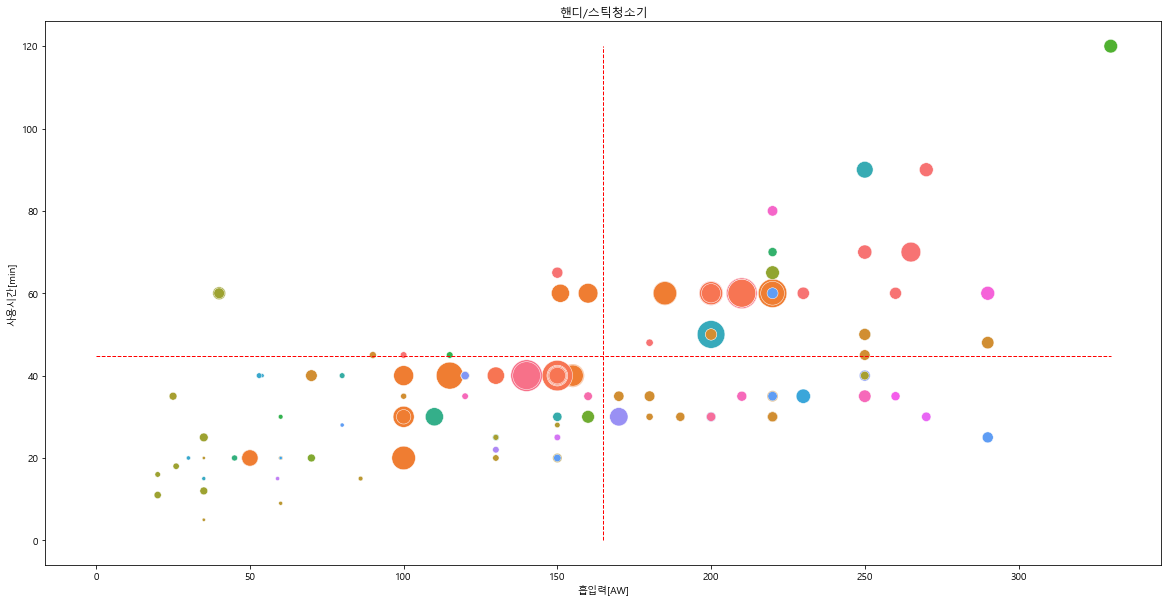

In [45]:
plt.figure(figsize=(20,10))
plt.title('핸디/스틱청소기')

sns.scatterplot(x='흡입력[AW]', y='사용시간[min]', size='가격[원]', 
                hue=scatter_data['회사명'], data = scatter_data, sizes=(10,1000), 
                legend=False)

#사용시간 평균선
plt.plot([0, suction_max],
        [use_time_mean, use_time_mean],
        'r--',
        lw = 1) 

#흡입력 평균선
plt.plot([suction_mean, suction_mean],
         [0, use_time_max],
        'r--',
        lw = 1) 

plt.show()

#### scatter plot 확인결과:
 - 가격이 가장 높은 상품들이 평균 흡입력과 평균 사용시간 주변에 몰려있는 경향이 있다. 
 
 - 특히, 사용시간이 평균보다 짧고흡입력도 작음에도 불구하고 가격이 높은 상품들이 모여있는 그룹이 보이지만, 해당 그룹을 제외 하고는 사용시간이 높아지고 흡입력이 높아질 수록 가격이 높아지는 경향이 보인다.
 
 - 가성비가 낮은 (가격은 비싸고 사용시간과 흡입력은 낮은) 제품들은 어떤 다른 spec을 갖고있는지, 어떤 브래드의 제품인지를 알아보면 좋을것같다. 원본 데이터 셋의 스펙 목록column에서 흡입력과 사용시간 외에 추가적인 항목을 추출해와서 다시 scatterplot을 그려볼 필요가 있다.

### 인기 제품의 데이터 시각화
인기순으로 상위 20개의 모델만 선택해 비교분석 그래프를 그린다.

In [46]:
#result_data로 받아온 table의 값이 웹사이드 인기순으로 나열된 순서이기때문에, 
#처음 20개를 가장 인기가 높은Top20으로 선정해서 scatter plot을 그려본다

#인기Top20 제품 선택
top_data_selected = scatter_data[:20]
print(len(top_data_selected))

#기준이 될 max, mean값을 계산한다
suction_max_value = top_data_selected['흡입력[AW]'].max()
suction_mean_value = top_data_selected['흡입력[AW]'].mean()
use_time_max_value = top_data_selected['사용시간[min]'].max()
use_time_mean_value = top_data_selected['사용시간[min]'].mean()
print("흡입력 max",suction_max_value)
print("흡입력 mean",suction_mean_value)
print("사용시간 max",use_time_max_value)
print("사용시간 mean",use_time_mean_value)

20
흡입력 max 270.0
흡입력 mean 189.3
사용시간 max 90.0
사용시간 mean 58.5


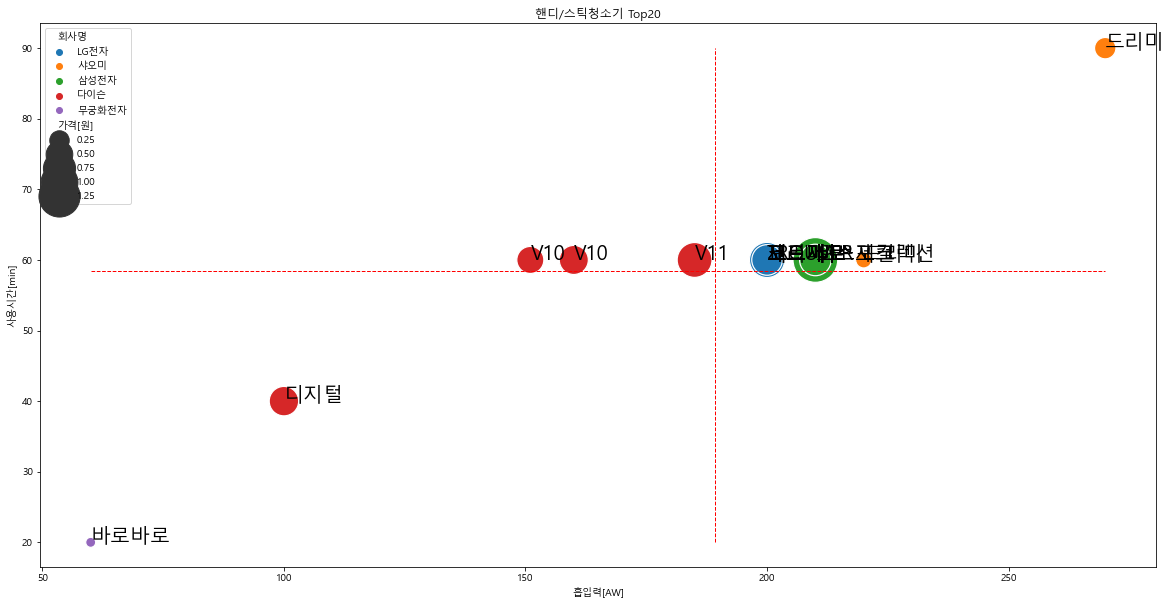

In [47]:
plt.figure(figsize=(20,10))
plt.title('핸디/스틱청소기 Top20')

sns.scatterplot(x='흡입력[AW]', y='사용시간[min]', size='가격[원]',
               hue = top_data_selected['회사명'],
               data = top_data_selected, sizes=(100, 2000))

plt.plot([60, suction_max_value],[use_time_mean_value,use_time_mean_value],
        'r--',lw=1)

plt.plot([suction_mean_value,suction_mean_value], [20, use_time_max_value],
        'r--',lw=1)

for index, row in top_data_selected.iterrows():
    x = row['흡입력[AW]']
    y = row['사용시간[min]']
    s = row['모델'].split(' ')[0]
    plt.text(x, y, s, size=20)

plt.show()

#### scatter plot 확인결과:
 - Top20 제품들의 대부분이 비슷한 사용 시간을 갖고있고, 평균의 +-50AW 범위한에 들어오는 흡입력을 갖고있다. 가격에는 큰 차이가 없지만, 삼성정자 제품이 흡입력이 더 높고 가격이 조금 더 높은 경향을 갖고있다. 
 - Top20 제품에서도 차이를 뚜렷히 보이는점은 가성비가 현저하게 놓아보이는 샤오미의 드리미 무선청소기가 있고
 - 무궁화전자의 바로바로 무선청소기는 가격은 낮지만, 사용시간이나 흡입력 면에서 성능이 많이 떨어진다. 